In [2]:
import pandas as pd
import geopandas as gpd

In [5]:
votos = pd.read_csv('../data/votacao_candidato_munzona_2022_BR.csv', encoding='latin-1', sep=';')

In [6]:
votos.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,03/03/2024,19:56:46,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681181,PARTIDO ISOLADO,UP,N,0,Válido,0,4,NÃO ELEITO
1,03/03/2024,19:56:46,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,461,Válido,461,4,NÃO ELEITO
2,03/03/2024,19:56:46,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,0,Válido,0,4,NÃO ELEITO
3,03/03/2024,19:56:46,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,2,Válido,2,4,NÃO ELEITO
4,03/03/2024,19:56:46,2022,2,Eleição Ordinária,1,544,Eleição Geral Federal 2022,02/10/2022,F,...,#NULO#,280001681210,PARTIDO ISOLADO,NOVO,N,11,Válido,11,4,NÃO ELEITO
5,03/03/2024,19:56:46,2022,2,Eleição Ordinária,2,545,Eleição Geral Federal 2022,30/10/2022,F,...,PC do B / PT / PV,280001681359,COLIGAÇÃO BRASIL DA ESPERANÇA,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,N,4531,Válido,4531,1,ELEITO
6,03/03/2024,19:56:46,2022,2,Eleição Ordinária,2,545,Eleição Geral Federal 2022,30/10/2022,F,...,PC do B / PT / PV,280001681359,COLIGAÇÃO BRASIL DA ESPERANÇA,(PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...,N,1207,Válido,1207,1,ELEITO
7,03/03/2024,19:56:46,2022,2,Eleição Ordinária,2,545,Eleição Geral Federal 2022,30/10/2022,F,...,#NULO#,280001682069,PELO BEM DO BRASIL,PP / REPUBLICANOS / PL,N,936,Válido,936,4,NÃO ELEITO
8,03/03/2024,19:56:46,2022,2,Eleição Ordinária,2,545,Eleição Geral Federal 2022,30/10/2022,F,...,#NULO#,280001682069,PELO BEM DO BRASIL,PP / REPUBLICANOS / PL,N,6445,Válido,6445,4,NÃO ELEITO
9,03/03/2024,19:56:46,2022,2,Eleição Ordinária,2,545,Eleição Geral Federal 2022,30/10/2022,F,...,#NULO#,280001682069,PELO BEM DO BRASIL,PP / REPUBLICANOS / PL,N,1420,Válido,1420,4,NÃO ELEITO


In [7]:
votos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
       'NM_TIPO_DESTINACAO_VOTOS', 'QT_VOTOS_NOMINAIS_VALIDOS',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [19]:
votos_2turno = votos[votos['NR_TURNO']>1]

In [10]:
colunas = ['QT_VOTOS_NOMINAIS_VALIDOS','NM_CANDIDATO','SG_UF']

In [13]:
votos[colunas]

,QT_VOTOS_NOMINAIS_VALIDOS,NM_CANDIDATO,SG_UF
0,0,LEONARDO PÉRICLES VIEIRA ROQUE,AC
1,461,LUIZ FELIPE CHAVES D AVILA,RS
2,0,LUIZ FELIPE CHAVES D AVILA,TO
3,2,LUIZ FELIPE CHAVES D AVILA,PB
4,11,LUIZ FELIPE CHAVES D AVILA,PA
...,...,...,...
81674,1,JOSE MARIA EYMAEL,RN
81675,0,JOSE MARIA EYMAEL,BA
81676,0,JOSE MARIA EYMAEL,BA
81677,0,JOSE MARIA EYMAEL,BA


In [29]:
votos_2turno[colunas]\
    .groupby(['NM_CANDIDATO','SG_UF'])\
    .sum()\
    .reset_index()\
    .to_csv('../data/votos_2_turno.csv')

In [30]:
votos_mapeamento = pd.read_csv('../data/votos_2_turno.csv')

In [31]:
def mapear_dados(origem, destino, coluna_origem, coluna_destino, coluna_valor):
    return destino[coluna_destino].map(origem.set_index(coluna_origem)[coluna_valor])

In [33]:
mapa_br = gpd.read_file('../data/brasil_uf.gpkg')

In [35]:
mapa_br.columns

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry'], dtype='object')

In [36]:
votos_mapeamento.columns

Index(['Unnamed: 0', 'NM_CANDIDATO', 'SG_UF', 'QT_VOTOS_NOMINAIS_VALIDOS'], dtype='object')

In [44]:
votos_lula = votos_mapeamento[votos_mapeamento['NM_CANDIDATO']
                              == 'LUIZ INÁCIO LULA DA SILVA']


In [50]:
mapear_dados(votos_lula, mapa_br, 'SG_UF', 'SIGLA_UF', 'QT_VOTOS_NOMINAIS_VALIDOS')

0       121566
1      1004991
2      2509084
3       189918
4       434593
5      2668425
6      1551383
7      3807891
8      1326785
9      1601953
10     3640933
11      976831
12      862951
13     6097815
14     6190960
15      926767
16     4156217
17    11519882
18     2506605
19     1351918
20     2891851
21      599547
22      652786
23     1542115
24      729295
25      262904
26       67128
Name: SIGLA_UF, dtype: int64

KeyError: 'votos_lula'

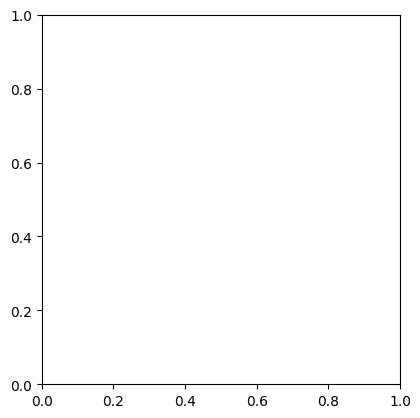

In [51]:
mapa_br.plot(column='votos_lula')